### project to increase sales at Toyota service centers for both B2B and B2C customers for R
- จุดประสงค์ในการทำโปรเจ็ค
- เป็นโปรเจ็คในเพื่อนำเสนอข้อมูล เกี่ยวการวิเคราะห์เพื่อแสดงความสามารถในการวิเคราะห์
- หาช่องทางในการสร้างยอกขายให้กับบริษัท ถ้าบริษัทต้องการนำข้อมูลนี้ไปใช้
- ข้อมูลนี้เป็นข้อมูลเก่าปี 2022 เป็นการนำเสนอเพื่อแสดงควาสามารถของผู้วิเคราะห์เท่านั้นว่าสามารถทำงานสาน data analysis ได้จริง โดยจะแสดงออกถึงความสามารถในการเขียน code เพื่อวิเคราะห์ข้อมูลด้วย ภาษา R

In [1]:
url = "https://docs.google.com/spreadsheets/d/1SGG-9RWKjIKAlzg3-QOxqszodXV-mDiKWVX50rohLaU/edit?usp=sharing"

In [2]:
library(tidyverse)
library(data.table)
library(lubridate)
library(dplyr)
library(ggplot2)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS8POavN_Mby1JY7T3WXosyIpINkGO90lR5o1HPhPfseJaWrxIj58BXqtmDT_EBPQbIzrjS_HAK3hTy/pub?output=csv"

### ทำการเปลี่ยน columns ให้เหมาะสม

In [4]:
data <- read.csv(url)
data

Timestamp,เลขที.ใบสั.งซ.อม,ทะเบียนรถ,ชื.อ...นามสกุล,ประเภท,เบอร.โทรศัพท.,จังหวัด,ภาคที.อยู.,เขต,แขวง,⋯,ระยะทางวันเข.าซ.อม,น.ำมันที.ลูกค.าเลือกใช.,ค.าใช.จ.าย,อะไหล.เสนอเพิ.มเติม,ยอดเสนออะไหล.เพิ.มเติม,list_no,สถานะ,ช.างผู.ทำการเสนอ,รหัสแคมเปญ,พนักงานผู.ให.บริการ
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,⋯,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,1142,NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,⋯,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,9755,NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,⋯,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,76870,NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,1515,NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,⋯,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,7538,ชุดลูกหมากแร็กตัวนอกใน,26857,1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 12:26:44,GSJ22-00006,8กน-1643,บริษัท ซีพีที ไดร์ แอนด์ เพาเวอร์ จำกัด มหาชน,บริษัท,0814419338,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,166019,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,8862,NO,0,0,อนุมัติ,sbooncha,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 14:46:13,GSJ22-00007,ศว-8533,สมโภชน์ จินดาวัฒนะ,ชาย,0819027983,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,จรเข้บัว,⋯,365797,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,2378,NO,0,0,อนุมัติ,ksriwanp,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 15:25:33,GSJ22-00008,ภอ-1745,สมศักดิ์ โภควรรณา,ชาย,0899680918,นนทบุรี,ภาคกลาง,เมืองนนทบุรี,สวนใหญ่,⋯,201324,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,500,ท่อแอร์|ชุดมอเตอร์กระจกมองข้างซ้ายขวา,23547,5,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 15:34:09,GSJ22-00009,ชอ-1639,ชูเวช ชาญสง่าเวช,ชาย,0819121535,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,⋯,218922,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,50,ไฟใหญ่หน้าซ้ายขวา,9159,2,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


In [5]:
names(data) <- c("timestamp","jobnumber","car registration","name","consumer","phonnumber","province","sector","county",
"Subdistrict","namecar","modelcar","delivery day","car problem","operating hours","time","service","Customer","payment",
"odometer reading","oil","expense","auto parts","price offer","countpart","approval status","auto repairman","campaign",
"service advisor")

In [6]:
data

timestamp,jobnumber,car registration,name,consumer,phonnumber,province,sector,county,Subdistrict,⋯,odometer reading,oil,expense,auto parts,price offer,countpart,approval status,auto repairman,campaign,service advisor
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,⋯,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,1142,NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,⋯,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,9755,NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,⋯,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,76870,NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,1515,NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,⋯,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,7538,ชุดลูกหมากแร็กตัวนอกใน,26857,1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 12:26:44,GSJ22-00006,8กน-1643,บริษัท ซีพีที ไดร์ แอนด์ เพาเวอร์ จำกัด มหาชน,บริษัท,0814419338,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,166019,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,8862,NO,0,0,อนุมัติ,sbooncha,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 14:46:13,GSJ22-00007,ศว-8533,สมโภชน์ จินดาวัฒนะ,ชาย,0819027983,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,จรเข้บัว,⋯,365797,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,2378,NO,0,0,อนุมัติ,ksriwanp,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 15:25:33,GSJ22-00008,ภอ-1745,สมศักดิ์ โภควรรณา,ชาย,0899680918,นนทบุรี,ภาคกลาง,เมืองนนทบุรี,สวนใหญ่,⋯,201324,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,500,ท่อแอร์|ชุดมอเตอร์กระจกมองข้างซ้ายขวา,23547,5,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 15:34:09,GSJ22-00009,ชอ-1639,ชูเวช ชาญสง่าเวช,ชาย,0819121535,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,⋯,218922,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,50,ไฟใหญ่หน้าซ้ายขวา,9159,2,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


### ตรวจสอบข้อมูล
- จากการตรวจสอบไม่พบ columns ที่มีค่าว่างแสดงว่าข้อมูลนั้นมีความสมบูรณ์ครบถ้วน

In [7]:
any(is.na(data))

FALSE

In [8]:
colSums(is.na(data))

timestamp 0 jobnumber 0 car registration 0 name 0 consumer 0 phonnumber 0 province 0 sector 0 county 0 Subdistrict 0 namecar 0 modelcar 0 delivery day 0 car problem 0 operating hours 0 time 0 service 0 Customer 0 payment 0 odometer reading 0 oil 0 expense 0 auto parts 0 price offer 0 countpart 0 approval status 0 auto repairman 0 campaign 0 service advisor 0

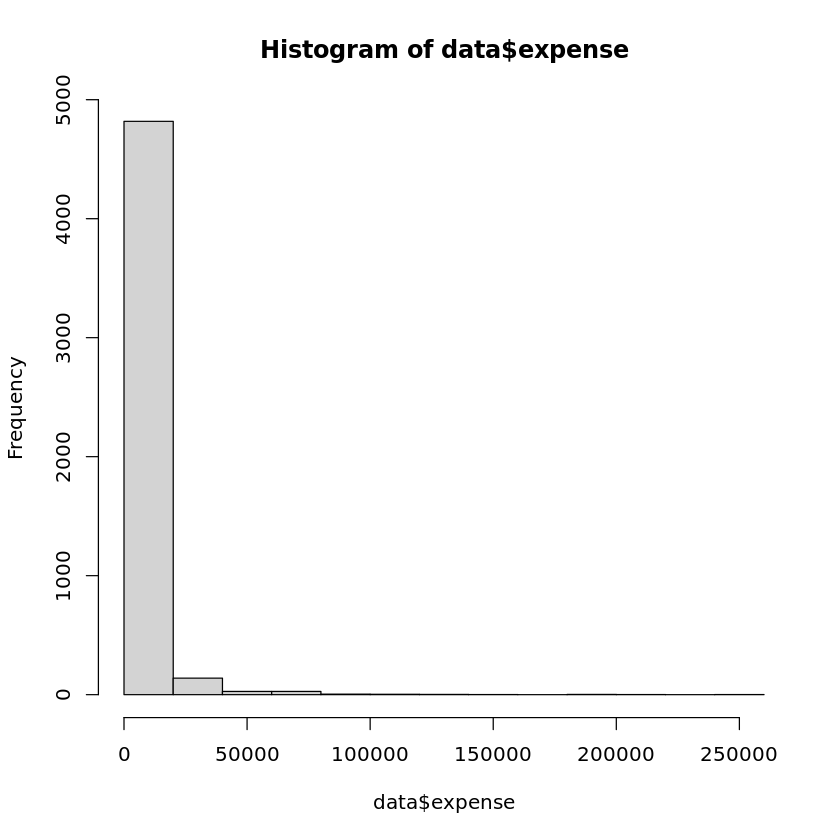

In [9]:
hist(data$expense)

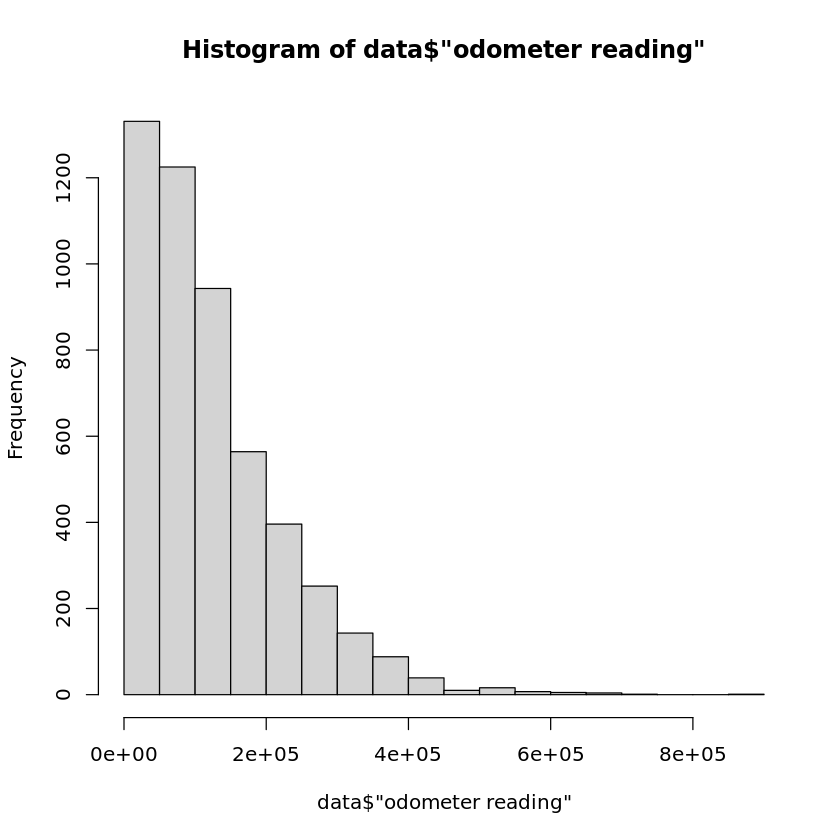

In [10]:
hist(data$'odometer reading')

 [1] "timestamp"        "jobnumber"        "car registration" "name"            
 [5] "consumer"         "phonnumber"       "province"         "sector"          
 [9] "county"           "Subdistrict"      "namecar"          "modelcar"        
[13] "delivery day"     "car problem"      "operating hours"  "time"            
[17] "service"          "Customer"         "payment"          "odometer reading"
[21] "oil"              "expense"          "auto parts"       "price offer"     
[25] "countpart"        "approval status"  "auto repairman"   "campaign"        
[29] "service advisor" 
[1] "integer"


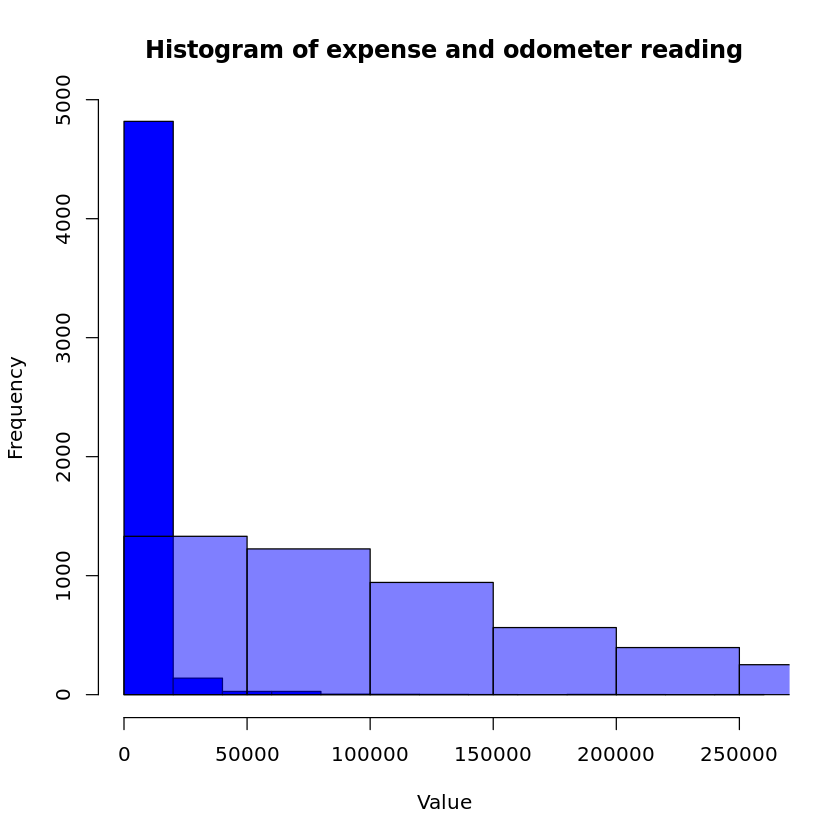

In [11]:
# Check column names
print(colnames(data))

# Check the type of 'odometer reading' column
print(class(data$'odometer reading'))

# If the output of the above command is not 'numeric', convert the column to numeric
data$'odometer reading' <- as.numeric(as.character(data$'odometer reading'))

# Check if there're any NA values after the conversion, if so, handle them appropriately
if(any(is.na(data$'odometer reading'))){
    data$'odometer reading'[is.na(data$'odometer reading')] <- mean(data$'odometer reading', na.rm = TRUE)
}

# Draw the histogram
hist(data$expense, col = "blue", main = "Histogram of expense and odometer reading", xlab = "Value")
hist(data$'odometer reading', col = rgb(0, 0, 1, alpha = 0.5), add = TRUE)

### วิเคราะห์กราฟ histogram
- พบว่ากราฟไปกองรวมอยู่กันในด้านซ้ายแสดงว่า รถที่เข้ามารับบริการในปี 2022 นั้นยังไม่มียอดค่าใช้จ่ายที่เยอะเท่าไร
- ในส่วน columns odometer reading หรือเลขไมล์รถ ก็พบว่ากระจายตัวไปอยู่ในทางซ้ายเช่นกัน แสดงให้เห็นว่า รถที่เข้ามาใช้บริการนั้นมักจะอยู่ในเลขไมล์รถที่ไม่เยอะเท่าไร

### วิเคราะห์ boxplot columns expense
- พบว่าใน columns ค่าใช้จ่ายมักจะจ่ายค่าใช้บริการอยู่ที่ประมาณไม่น่าจะเกินหลัก 10000 บาท โดยประมาณ
- จะมีการจ่ายเงินที่มากอยู่ไม่กี่คัน มากที่สุดอยู่ที่ 250000 บาท

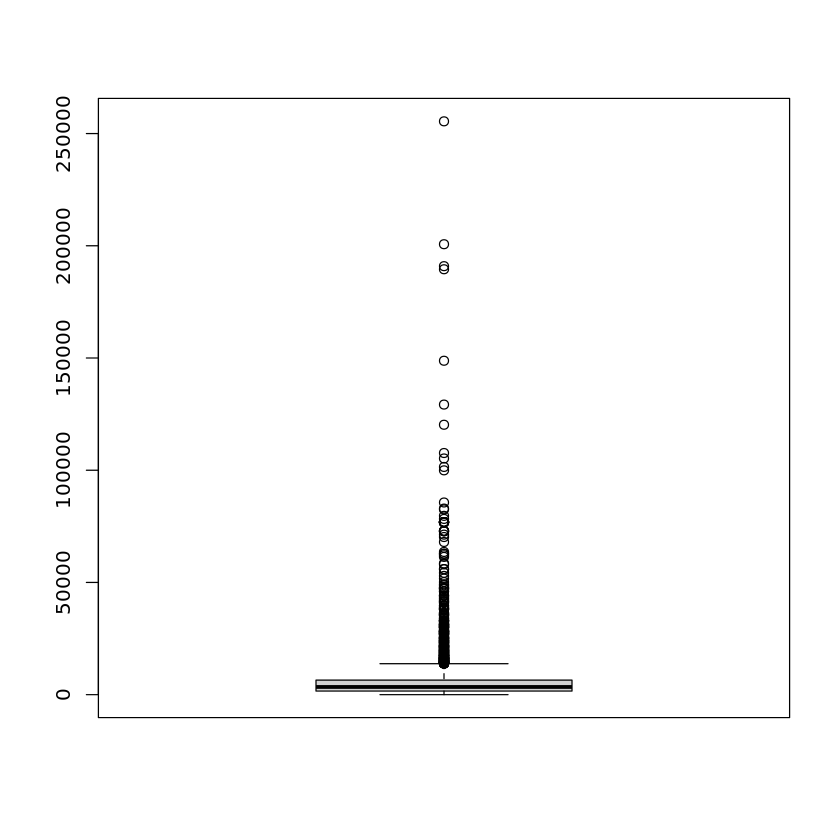

In [12]:
boxplot(data$'expense')

### วิเคราะห์ boxplot columns odometer_reading
- พบว่าเลขไมล์โดยรวมที่เข้ามารับบริการนั้นยังเยอะอยู่
- แสดงว่าต่อให้เลขไมล์เยอะ ลูกค้าก็ยังนิยมเข้ารับบริการของศูนย์บริการอยู่ แต่อาจจะน้อยกว่ารถที่ยังใหม่เพราะรถเก่าบางส่วนจะออกไปใช้บริการอู้รถยนต์อื่นๆ

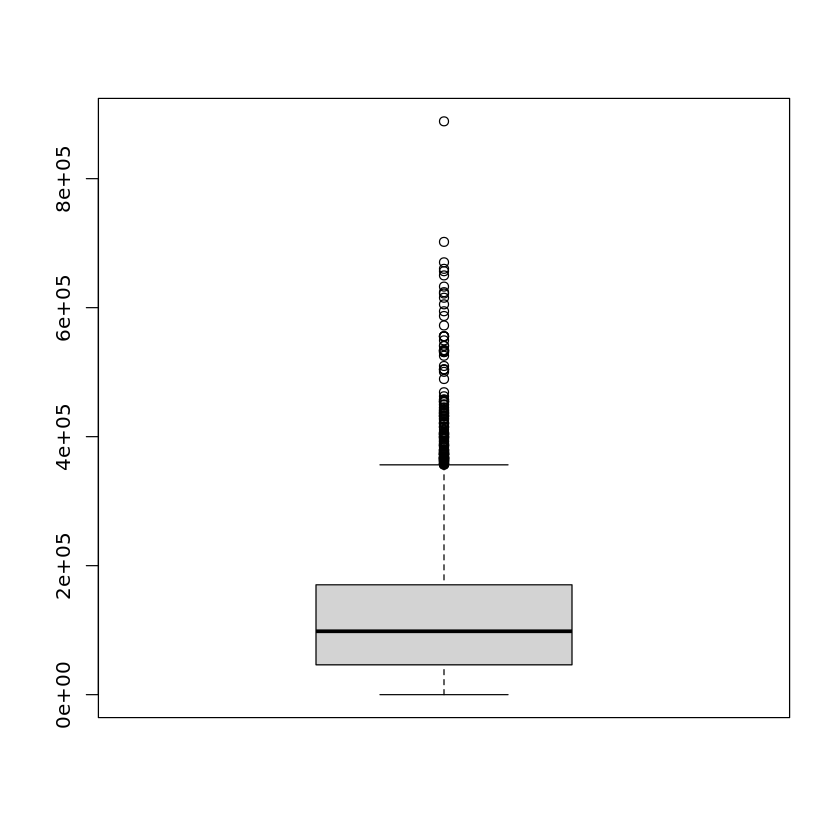

In [13]:
boxplot(data$'odometer reading')

### สรุปสถิติขั้นพื้นฐาน
- expense ค่าใช้จ่ายรวมในปี 2022 29,697,112 บาท
- ค่าใช้จ่ายเฉลี่ยโดนในปี 2022 ประมาณคันละ 5,909 บาท
- ลูกค้าที่มียอดค่าใช้จ่ายสูงสุด คือ 25,5447 บาท
- อะไหล่เพิ่มเติม เฉลี่ยคันละ 2761 บาท
- ยอดเสนอรวมในปี 2022 13,877,936 บาท
- q1 ค่าใช้จ่ายโดยประมาณ 1602 
- q3 ค่าใช้จ่ายโดยประมาณ 6490

In [14]:
# Identify numeric columns
num_variables <- sapply(data, is.numeric)  

# Initialize an empty dataframe for summary statistics
summary_stats <- data.frame(variable = names(data[num_variables]))

# Compute summary statistics for numeric columns
summary_stats$count <- sapply(data[num_variables], length)
summary_stats$mean <- sapply(data[num_variables], mean)
summary_stats$median <- sapply(data[num_variables], median)
summary_stats$sum <- sapply(data[num_variables], sum)
summary_stats$min <- sapply(data[num_variables], min)
summary_stats$max <- sapply(data[num_variables], max)
summary_stats$sd <- sapply(data[num_variables], sd)

In [15]:
summary_stats

variable,count,mean,median,sum,min,max,sd
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
odometer reading,5025,1.222139e+05,98322,614124680,4,888886,1.000030e+05
expense,5025,5.909873e+03,3431,29697112,1,255447,1.086666e+04
price offer,5025,2.761778e+03,0,13877936,0,180488,1.142875e+04
countpart,5025,6.602985e-01,0,3318,0,35,2.607526e+00


In [16]:
# Compute summary statistics only for numeric columns
summary_stats_quantile <- data[,num_variables] %>%
  summarise_all(list(mean = mean, sd = sd,
                     q1 = ~quantile(.x, 0.25),
                     q3 = ~quantile(.x, 0.75))) %>%
  pivot_longer(cols = everything(),
               names_to = c(".value", "stat"),
               names_sep = "_")
summary_stats_quantile

stat,odometer reading,expense,price offer,countpart
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mean,122213.9,5909.873,2761.778,0.6602985
sd,100003.0,10866.664,11428.752,2.6075256
q1,46293.0,1602.000,0.000,0.0000000
q3,170340.0,6490.000,0.000,0.0000000


### Descriptive Analytics
- มุ่งเน้นไปที่การอธิบายข้อมูลในอดีตว่าเป็นอย่างไร มีวัตถุประสงค์เพื่อให้เข้าใจภาพรวมของข้อมูล
- ยอดขายโดยรวมของปี 2022 อยู่ที่เท่าไร
- สินค้าน้ำมันอะไรที่ขายดีที่สุด
- ลูกค้าประเภทไหนที่เข้ามาใช้บริการเรามากที่สุด

In [17]:
sum(data$expense)
#รายได้รวมในปี 2022 เท่ากับ

29697112.06

In [18]:
table(data$oil)
#น้ำมัน คือสินค้าหลักที่ขายดีที่สุดในปี 2022 น้ำมันเครื่องกึ่งสังเคราะห์สีเขียว


  น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว    น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง 
                       2595                        1230 
  น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน      น้ำมันเครื่องสังเคราะห์ สีเทา 
                        681                         290 
น้ำมันเครื่องสังเคราะห์ สีเหลืองทอง  น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา 
                         83                         146 

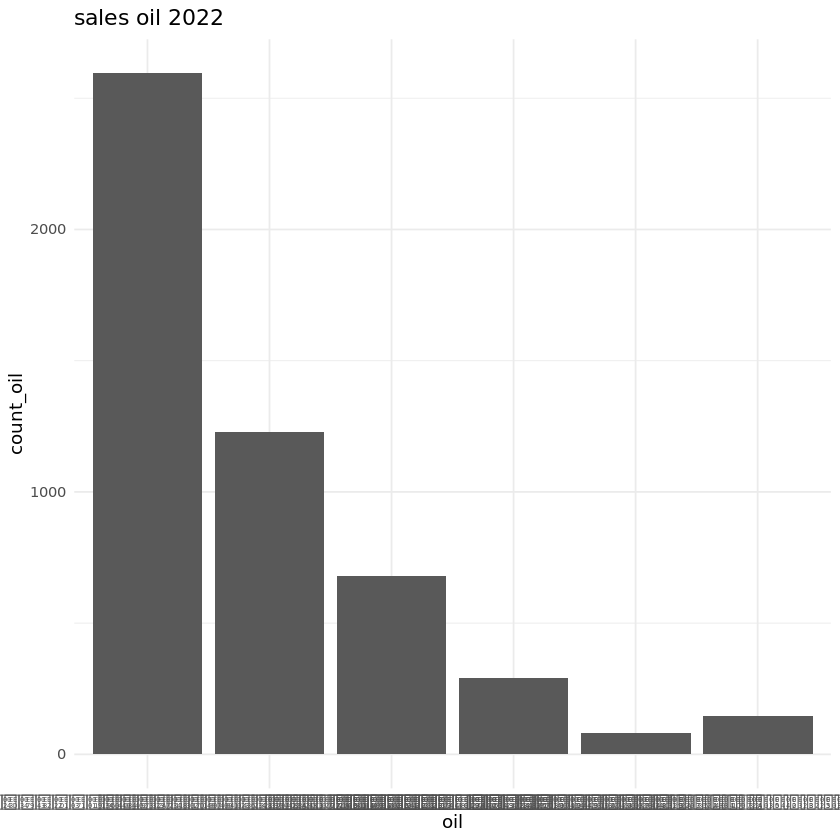

In [19]:
# Get the count of each oil type using the table() function and convert it to a dataframe
oil_df <- as.data.frame(table(data$oil))
# Rename the columns
colnames(oil_df) <- c('oil_type', 'count')
# Plot the oil type vs count data
ggplot(oil_df, aes(x = oil_type, y = count)) +
  geom_bar(stat = "identity") +
  labs(x = "oil", y = "count_oil", title = "sales oil 2022") +
  theme_minimal()

## จากข้อมูล
- พบว่าลูกค้าของ บริษัท โตโยต้ามหานคร ส่วนใหญ่เป็นลูกค้า บริษัทเป็นส่วนมาก
- และมีลูกค้าที่เป็นบุคคลทั้งชายและหญิง
- จากสัดส่วน พบว่าถ้าเอา ลูกค้าทั้งชายและหญิงมารวมกัน จะมีจำนวนมากกว่า ลูกค้าบริษัทประมาณ 220 คน

In [20]:
table(data$consumer)


          ชาย          บริษัท           หญิง หน่วยงานราชการ  ห้างหุ้นส่วนจำกัด 
         1256          2389          1353            20             7 

### สรุปการวิเคราะห์แบบ Descriptive Analytics
- รายได้รวมในปี 2022 คือ 29,697,112 ล้านบาท
- สินค้าที่ขายดรที่สุดคือน้ำมันเครื่องยนต์สีเขียว ขายได้ทั้งหมด 2595 g
- ลูกค้าที่เข้ามาใช้บริการกับเรามากที่สุด คือลูกค้า บริษัท และ ลูกค้าบุคคลทั้งชายและหญิง

### Diagnostic Analytics
- มุ่งเน้นไปที่การค้นหาสาเหตุของเหตุการณ์ที่เกิดขึ้นในอดีต
1. ทำไมน้ำมันกึ่งสังเคราะห์สีเขียว ถึงขายดีที่สุด
2. ทำไมน้ำมันเครื่องสังเคราะห์ 100 % ถึงขายได้น้อย
3. เดือนไหนเรามีลูกค้ามากที่สุดในปี 2022

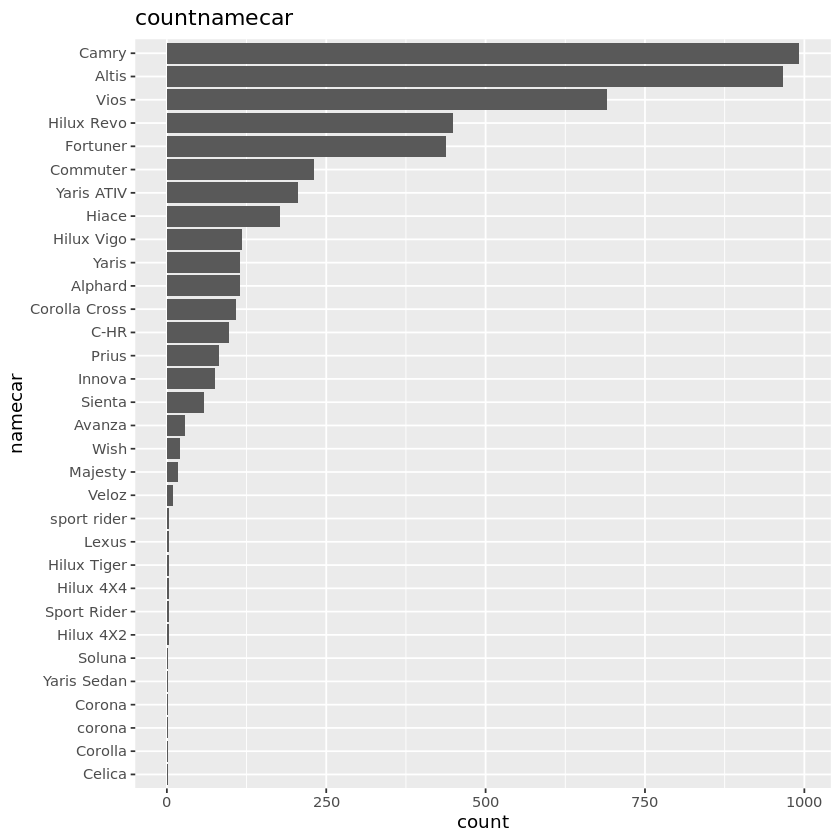

In [21]:
# create the data frame
car_df <- data %>% 
          group_by(namecar) %>%
          summarise(count=n())

# plot the data
ggplot(car_df, aes(x = reorder(namecar, count), y = count)) +
  geom_bar(stat = "identity") +
  labs(x = "namecar", y = "count", title = "countnamecar") +
  coord_flip()

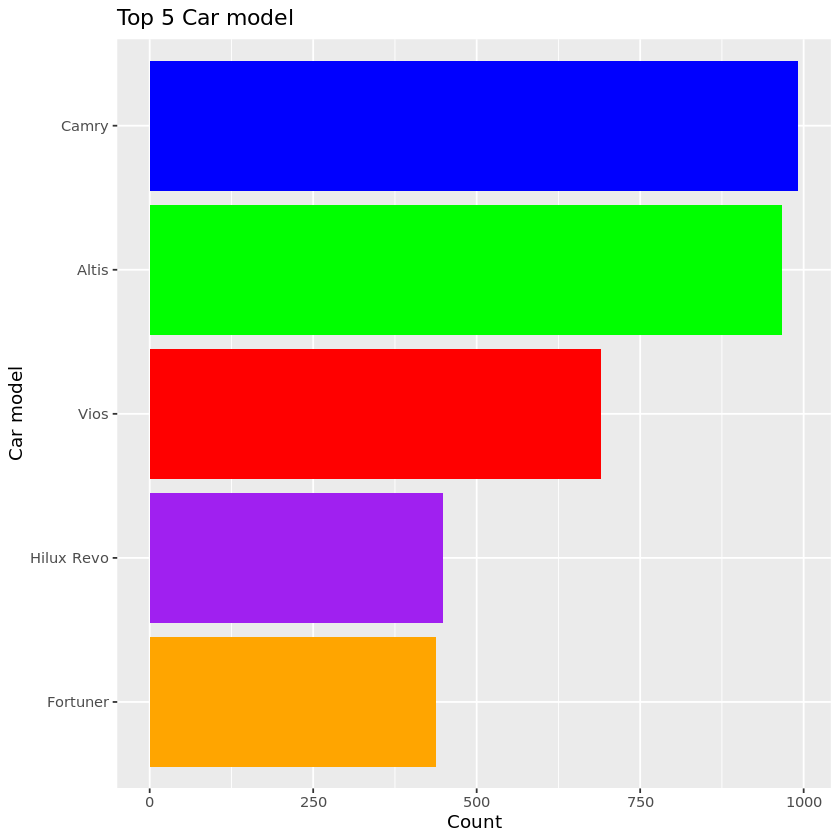

In [22]:
car_df <- data %>% 
  group_by(namecar) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Select the top 5 car models
top_5_cars <- head(car_df, 5)

# Create a bar plot
ggplot(top_5_cars, aes(x = reorder(namecar, count), y = count)) +
  geom_bar(stat = "identity" ,fill = c("blue", "green", "red", "purple", "orange")) +
  labs(x = "Car model", y = "Count", title = "Top 5 Car model") +
  coord_flip()

In [23]:
camry <-subset(data,data$namecar== "Camry")

In [24]:
# Group the 'camry' data by 'oil' and count the frequency
camry_oil_count <- camry %>% 
                    group_by(oil) %>% 
                    summarise(count = n())

# Print the 'camry_oil_count' dataframe
print(camry_oil_count)

# A tibble: 4 × 2
  oil                         count
  <chr>                       <int>
1 น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว     638
2 น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน     329
3 น้ำมันเครื่องสังเคราะห์ สีเทา          8
4 น้ำมันเครื่องสังเคราะห์ สีเหลืองทอง    17


In [25]:
Altis <-subset(data,data$namecar== "Altis")

In [26]:
Altis_oil_count <- Altis %>% 
                    group_by(oil) %>% 
                    summarise(count = n())

# Print the 'camry_oil_count' dataframe
print(Altis_oil_count)

# A tibble: 3 × 2
  oil                       count
  <chr>                     <int>
1 น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว   838
2 น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน   116
3 น้ำมันเครื่องสังเคราะห์ สีเทา       13


In [27]:
Vios <- subset(data,data$namecar == "Vios")

In [28]:
Vios_oil_count <- Vios %>% 
                    group_by(oil) %>% 
                    summarise(count = n())

# Print the 'camry_oil_count' dataframe
print(Vios_oil_count)

# A tibble: 3 × 2
  oil                       count
  <chr>                     <int>
1 น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว   618
2 น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง      3
3 น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน    69


In [29]:
Hilux_Revo <- subset(data, data$namecar == "Hilux Revo")

In [30]:
Hilux_Revo_oil_count <- Hilux_Revo %>% 
                    group_by(oil) %>% 
                    summarise(count = n())

# Print the 'camry_oil_count' dataframe
print(Hilux_Revo_oil_count)

# A tibble: 4 × 2
  oil                        count
  <chr>                      <int>
1 น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว      4
2 น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง     390
3 น้ำมันเครื่องสังเคราะห์ สีเทา         2
4 น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา    53


In [31]:
Fortuner <- subset(data,data$namecar == "Fortuner")

In [32]:
Fortuner_oil_count <- Fortuner %>%
                    group_by(oil)%>%
                    summarise(count = n())
print(Fortuner_oil_count)

# A tibble: 5 × 2
  oil                        count
  <chr>                      <int>
1 น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว     13
2 น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง     339
3 น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน     10
4 น้ำมันเครื่องสังเคราะห์ สีเทา         5
5 น้ำมันเครื่องสังเคราะห์ดีเซล สีเทา    71


### จากที่เราทำการตรวจสอบรถ 5 รุ่นที่เข้าใช้บริการกับบริษัท โตโยต้า มหานคร
- ลูกค้ารถ camry ของบริษัทโตโยต้ามหานครส่วนใหญ่มักเลือกใช้ น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียวเป็นหลักในปี 2022 ขายได้ถึง 638 G
- ลูกค้ารถ Altis ของบริษัทโตโยต้ามหานคร ส่วนใหญ่เลือกใช้ น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว เป็นหลักในปี 2022 
ขายได้ถึง 838 G
- ลูกค้ารถ Vios ของบริษัทโตโยต้ามหานคร ส่วนใหญ่เลือกใช้น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว เป็นหลักในปี 2022
ขายได้ถึง 618 G
- ลูกค้า Hilux Revo ของบริษัทโตโยต้ามหานคร ส่วนใหญ่เลือกใช้น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง เป็นหลักในปี 2022
ขายได้ถึง 390 G
- ลูกค้า Fortuner ของบริษัทโตโยต้า มหานคร ส่วนใหญ่เลือกใช้น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง เป็นหลักในปี 2022
ขายได้ 339 G
### ทำไมน้ำมันสังเคราะห์ 100 % ถึงขายได้น้อย
1. ราคาแพงเนื่องจากลูกค้าอาจจะต้องการประหยัดค่าใช่จ่าย และเลือกใช้เป็นสินค้าที่ทดแทนได้
2. ทางศูนย์บริการอาจจะไม่ได้เชียร์ขายน้ำมันทำให้สินค้าไม่ได้รับการพิจาณาจากลูกค้า

In [33]:
oil_100_percent <- subset(data, data$oil == "น้ำมันเครื่องสังเคราะห์  สีน้ำเงิน")

In [34]:
oil_100_percent

,timestamp,jobnumber,car registration,name,consumer,phonnumber,province,sector,county,Subdistrict,⋯,odometer reading,oil,expense,auto parts,price offer,countpart,approval status,auto repairman,campaign,service advisor
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,⋯,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,1142,NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
3,4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,⋯,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,76870,NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
7,4/2/2023 14:46:13,GSJ22-00007,ศว-8533,สมโภชน์ จินดาวัฒนะ,ชาย,0819027983,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,จรเข้บัว,⋯,365797,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,2378,NO,0,0,อนุมัติ,ksriwanp,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
14,4/2/2023 16:19:31,GSJ22-00014,ศฐ 9999,จีจี ทรานสปอร์ต จำกัด,บริษัท,0869513326,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,⋯,31173,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,2826,NO,0,0,อนุมัติ,sbooncha,PM LABOR60K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
23,4/2/2023 17:59:00,GSJ22-00023,2กธ-7263,สาลินี สุริยะโชติตระกูล,หญิง,0875561732,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,⋯,213716,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,21645,NO,0,0,อนุมัติ,ploecyr,NO,อัมรินทร์ ปานสวน
24,4/3/2023 10:20:35,GSJ22-00024,ชช-6897,อลงกต คชแก้ว,หญิง,0984682699,สมุทรปราการ,ภาคกลาง,บางพลี,ราชาเทวะ,⋯,192275,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,5148,ชุดยางหุ่มเพลาขับหน้าขวา|ชุดประเก็บฝาครอบวาลว์,3359,4,ไม่อนุมัติ,ksriwanp,"FREE24, PM PART60-200K",ดำรงศักดิ์ สิทธิสิริสัมพันธ์
26,4/3/2023 10:36:24,GSJ22-00026,วว-504,กรรณิการ์ ชลลัมพี,หญิง,0816941817,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,⋯,86662,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,4741,ยางแท่นเครื่องเบอร์1|อ็อกซิเจนเซ็นเซอร์|สายดึงฝากระโปรงท้าย|แบตเตอรรี่,26263,5,ไม่อนุมัติ,nchaimag,PM PART60-200K,อัมรินทร์ ปานสวน
30,4/3/2023 11:08:32,GSJ22-00030,ศว-957,อัมพวัน พงศ์สถาพร,หญิง,0814228844,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จันทรเกษม,⋯,283681,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,1132,NO,0,0,อนุมัติ,akhutkae,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
39,4/3/2023 15:05:34,GSJ22-00039,3กก-5105,สุทธิ ปั้นมา,ชาย,0828235494,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,147643,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,51,NO,0,0,อนุมัติ,ploecyr,FREE24,อัมรินทร์ ปานสวน


In [35]:
customer_oil_count <- oil_100_percent %>%
                    group_by(consumer)%>%
                    summarise(count = n())
print(customer_oil_count)

# A tibble: 5 × 2
  consumer      count
  <chr>         <int>
1 ชาย             272
2 บริษัท            153
3 หญิง             252
4 หน่วยงานราชการ     3
5 ห้างหุ้นส่วนจำกัด      1


### จากข้อมูล
- พบว่าลูกค้าที่เป็นบุคคล ทั้งผู้ชาย และ ผู้หญิง ก็นิยมใช้น้ำมันสังเคราะห์ 100 % เช่นกัน
- จาก insight ส่วนนี้เราต้องทำการให้บริษัทโตโยต้า มหานคร
- เน้นแสวงหาลูกค้าที่เป็น ลูกค้าบุคคลมากกว่า ลูกค้าบริษัท
- เน้นให้พนักงานรับรถเชียร์ขายหรือพูดเพื่อนำเสนอ สินค้า น้ำมันสังเคราะห์ 100 % เมื่อพบประวัติลูกค้าใช้น้ำมันกึ่งสังเคราะห์

In [36]:
namecar_oil_count <- oil_100_percent %>%
                    group_by(namecar)%>%
                    summarise(count = n())%>%
arrange(desc(count))
print(namecar_oil_count)

# A tibble: 17 × 2
   namecar       count
   <chr>         <int>
 1 Camry           329
 2 Altis           116
 3 Vios             69
 4 C-HR             36
 5 Prius            33
 6 Alphard          25
 7 Sienta           15
 8 Yaris            11
 9 Fortuner         10
10 Innova           10
11 Wish              8
12 Avanza            4
13 Corolla Cross     4
14 Lexus             4
15 Hilux Vigo        3
16 Hiace             2
17 Yaris ATIV        2


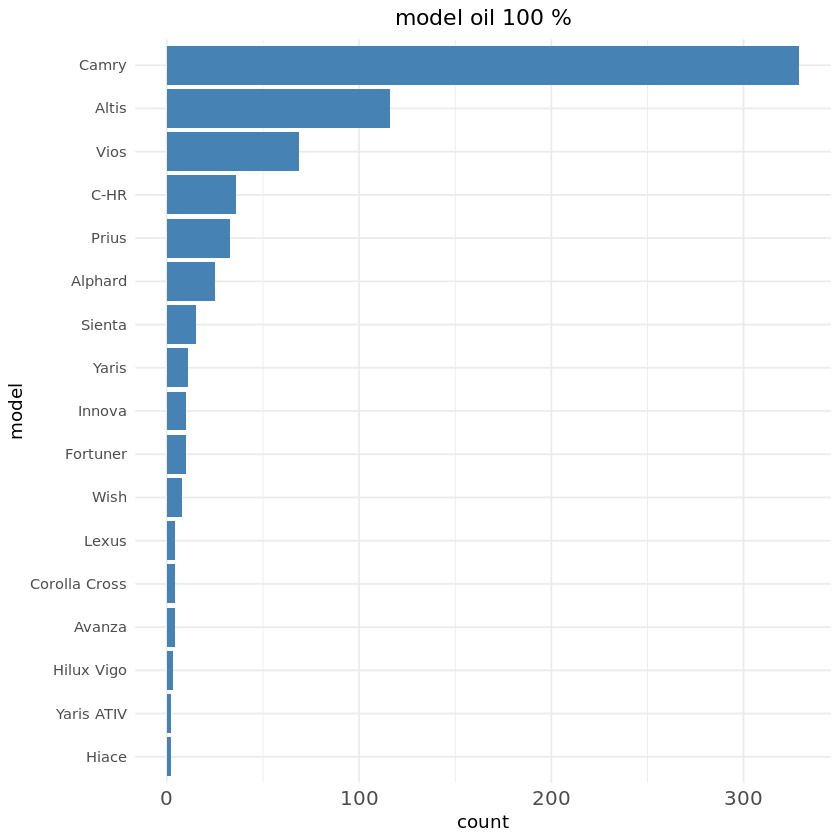

In [37]:
ggplot(namecar_oil_count, aes(x = reorder(namecar, count), y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "model", y = "count", title = "model oil 100 %") +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 12),
    plot.title = element_text(hjust = 0.5)
  )

### สเปคลูกค้าที่บริษัทต้องการ
- เป็นลูกค้าบุคคล ที่ใช้รถ toyota 
- รุ่นรถ camry Altis Vios C-HR Fortuner Corolla cross
- เนื่องจากผู้วิเคราะห์ข้อมูลนั้นอยู่ในส่วนของงานบริการหลังการขาย
- ทำให้รู้ว่านอกจากรุ่นรถที่ได้กล่าวมาแล้ว ยังมีอะไหล่ที่ ส่วนใหญ่จะราคาแพง ถ้าลูกค้าเป็นบุคคลทั่วไปการเปลี่ยนรถจะช้ากว่า กลุ่มลูกค้าบริษัท 
- เนื่องจากมีกฎหมายว่าควรเปลี่ยนรถทุกๆ 5 ปี หรืออย่างน้อยต้องไม่เกิน 7 ปี
- ดังนั้นควรหาลูกค้าที่เป็นบุคคลธรรมดาดีกว่า เนื่องจากถือครองรถได้นานกว่าลูกค้า บริษัท

In [38]:
data

timestamp,jobnumber,car registration,name,consumer,phonnumber,province,sector,county,Subdistrict,⋯,odometer reading,oil,expense,auto parts,price offer,countpart,approval status,auto repairman,campaign,service advisor
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
4/2/2023 10:51:03,GSJ22-00001,ขม-888,เอกฤทธิ์ พิพรรธน์พงศ์,ชาย,0818182058,กรุงเทพมหานคร,ภาคกลาง,คันนายาว,รามอินทรา,⋯,57355,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,1142,NO,0,0,อนุมัติ,akhutkae,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:23:35,GSJ22-00002,8กย-6183,กิตติยาภรณ์ ลิ้มประเสริฐ,หญิง,0830668451,กรุงเทพมหานคร,ภาคกลาง,พญาไท,พญาไท,⋯,32621,น้ำมันเครื่องสังเคราะห์ สีเทา,9755,NO,0,0,อนุมัติ,pmungmon,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:39:48,GSJ22-00003,พฮ-9399,ห้างหุ้นส่วนจำกัด ร่วมมิตรฟาร์ม,ห้างหุ้นส่วนจำกัด,0818375757,กรุงเทพมหานคร,ภาคกลาง,พญาไท,สามเสนใน,⋯,85391,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,76870,NO,0,0,อนุมัติ,akhutkae,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 11:53:36,GSJ22-00004,5กณ-928,ไทยเพรสทิจ เร้นท์ เอ คาร์ จำกัด,บริษัท,0660951522,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,64746,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,1515,NO,0,0,อนุมัติ,rthasi,SSC000096,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 12:14:17,GSJ22-00005,กล-2906,ดุษณี ตระกูลมหัทธโน,หญิง,0819143588,นครปฐม,ภาคกลาง,เมืองนครปฐม,บางแขม,⋯,321924,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,7538,ชุดลูกหมากแร็กตัวนอกใน,26857,1,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 12:26:44,GSJ22-00006,8กน-1643,บริษัท ซีพีที ไดร์ แอนด์ เพาเวอร์ จำกัด มหาชน,บริษัท,0814419338,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,ลาดยาว,⋯,166019,น้ำมันเครื่องกึ่งสังเคราะห์ สีแดง,8862,NO,0,0,อนุมัติ,sbooncha,PM PART60-200K,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 14:46:13,GSJ22-00007,ศว-8533,สมโภชน์ จินดาวัฒนะ,ชาย,0819027983,กรุงเทพมหานคร,ภาคกลาง,ลาดพร้าว,จรเข้บัว,⋯,365797,น้ำมันเครื่องสังเคราะห์ สีน้ำเงิน,2378,NO,0,0,อนุมัติ,ksriwanp,NO,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 15:25:33,GSJ22-00008,ภอ-1745,สมศักดิ์ โภควรรณา,ชาย,0899680918,นนทบุรี,ภาคกลาง,เมืองนนทบุรี,สวนใหญ่,⋯,201324,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,500,ท่อแอร์|ชุดมอเตอร์กระจกมองข้างซ้ายขวา,23547,5,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์
4/2/2023 15:34:09,GSJ22-00009,ชอ-1639,ชูเวช ชาญสง่าเวช,ชาย,0819121535,กรุงเทพมหานคร,ภาคกลาง,จตุจักร,จอมพล,⋯,218922,น้ำมันเครื่องกึ่งสังเคราะห์ สีเขียว,50,ไฟใหญ่หน้าซ้ายขวา,9159,2,ไม่อนุมัติ,ploecyr,FREE24,ดำรงศักดิ์ สิทธิสิริสัมพันธ์


In [39]:
data <- data %>%
  mutate(month = month(`operating hours`))

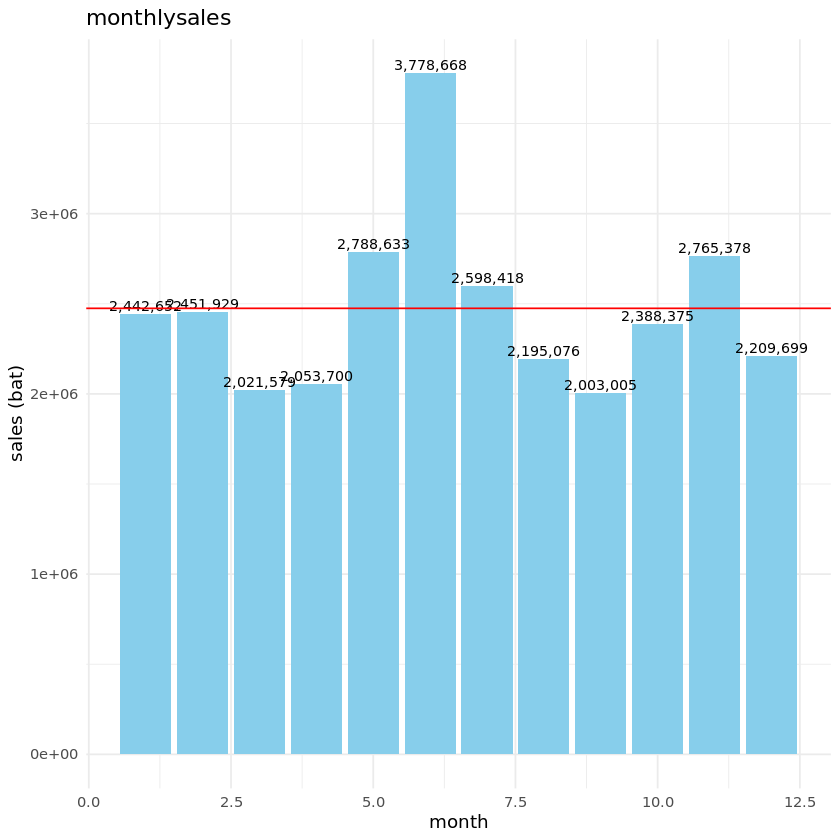

In [42]:
# create the monthly_sales data frame
monthly_sales <- data %>%
  group_by(month) %>%
  summarise(total_sales = sum(expense, na.rm = TRUE)) %>%
  arrange(month)

# Plot the data
ggplot(monthly_sales, aes(x = month, y = total_sales)) +
  geom_col(fill = "skyblue") +
  geom_text(aes(label = scales::comma(total_sales)), vjust = -0.3, size = 3) +
  geom_hline(yintercept = mean(monthly_sales$total_sales), color = "red") +
  labs(x = "month", y = "sales (bat)", title = "monthlysales") +
  theme_minimal()

### สรุปการวิเคราะห์แบบ Diagnostic Analytics
- มุ่งเน้นไปที่การค้นหาสาเหตุของเหตุการณ์ที่เกิดขึ้นในอดีต
1. ทำไมน้ำมันกึ่งสังเคราะห์สีเขียว ถึงขายดีที่สุด เนื่องจากลูกค้าต้องการประหยัดเศรษฐกิจไม่ค่อยดีเลยหันไปใช้น้ำมันกึ่งสังเคราะห์แทนเพราะมีราคาที่ถูกกว่า สามารถใช้ได้ 10000 กิโลเช่นกัน
2. ทำไมน้ำมันเครื่องสังเคราะห์ 100 % ถึงขายได้น้อย ลูกค้าบางส่วนหันไปใช้สินค้าทดแทนเพราะมีราคาที่ถูกกว่า หรืออาจจะเป็นเพราะทางศูนย์บริการ ไม่ได้เชียร์ขาย หรือและนำสินค้าตัวนี้ให้กับลูกค้าทำให้ลูกค้าไม่ได้พิจารณา สินค้า
3. เดือนไหนเรามีลูกค้ามากที่สุดในปี 2022 เดือน มิถุนายน เป็นเดือนที่มีรายได้เข้ามามากที่สุด
4. ยอดขายในปี 2022 เฉลี่ยอยู่ที่ ประมาณ 2,400000 โดยประมาณ
5. จากกราฟที่ดูใน 1 ปี มี 12 เดือน toyota มหานคร มียอดขายที่เกินค่าเฉลี่ยแค่ 4 เดือนถือว่ายังสอบไม่ผ่าน

### Predictive Analytics
- (การวิเคราะห์เชิงคาดการณ์)
ทำอะไร: ทำนายสิ่งที่จะเกิดขึ้นในอนาคต
- คำถาม: ถ้าเราต้องการรายได้ที่มากกกว่าค่าเฉลี่ย คือ 2700000 เราต้องมีรถเข้ามาใช้บริการกี่คัน ?

In [43]:
names(data)

'timestamp' 'jobnumber' 'car registration' 'name' 'consumer' 'phonnumber' 'province' 'sector' 'county' 'Subdistrict' 'namecar' 'modelcar' 'delivery day' 'car problem' 'operating hours' 'time' 'service' 'Customer' 'payment' 'odometer reading' 'oil' 'expense' 'auto parts' 'price offer' 'countpart' 'approval status' 'auto repairman' 'campaign' 'service advisor' 'month'

In [53]:
# Create a new column 'month' in 'data' dataframe from 'operating hours' column 
data$month <- format(as.Date(data$`operating hours`), "%m")

# Group data by 'month', calculate total transactions and sales
monthly_sales <- data %>%
                  group_by(month) %>%
                  summarise(
                    total_transactions = n(),
                    total_sales = sum(expense, na.rm = TRUE))

monthly_sales

month,total_transactions,total_sales
<chr>,<int>,<dbl>
01,419,2442652
02,361,2451929
03,384,2021579
04,384,2053700
05,395,2788633
06,504,3778668
07,426,2598418
08,425,2195076
09,357,2003005


In [55]:
model_set <- monthly_sales [, c("total_transactions", "total_sales")]
model_set

total_transactions,total_sales
<int>,<dbl>
419,2442652
361,2451929
384,2021579
384,2053700
395,2788633
504,3778668
426,2598418
425,2195076
357,2003005


In [58]:
# Fit a linear regression model using total sales as dependent variable and total transactions as independent variable
model <- lm(formula = total_sales ~ total_transactions, data = model_set)
summary(model)


Call:
lm(formula = total_sales ~ total_transactions, data = model_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-628038 -213401  -29810  152047  688110 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -550057    1094879  -0.502   0.6263  
total_transactions     7223       2601   2.777   0.0195 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 387600 on 10 degrees of freedom
Multiple R-squared:  0.4354,	Adjusted R-squared:  0.379 
F-statistic: 7.713 on 1 and 10 DF,  p-value: 0.01954


### จากผลลัพธ์ที่ได้ สามารถสรุปได้ดังนี้

- ความสัมพันธ์เชิงบวก: มีความสัมพันธ์เชิงบวกระหว่าง total_transactions และ total_sales หมายความว่า เมื่อจำนวนธุรกรรมเพิ่มขึ้น ยอดขายรวมก็จะเพิ่มขึ้นเช่นกัน
- โมเดลมีความแม่นยำปานกลาง: ค่า R-squared อยู่ที่ 0.4354 ซึ่งหมายความว่าโมเดลสามารถอธิบายความแปรปรวนของยอดขายได้ประมาณ 43.54% ถือว่าเป็นการอธิบายได้ปานกลาง
ตัวแปร total_transactions มีนัยสำคัญทางสถิติ: ค่า p-value ของ total_transactions น้อยกว่า 0.05 แสดงว่าตัวแปรนี้มีความสัมพันธ์กับ total_sales อย่างมีนัยสำคัญทางสถิติ

### สร้าง model ทำนายว่า ถ้าเราต้องการรายได้ที่ผ่านเกณฑ์ค่าเฉลี่ยนต้องมีรถเข้ามาใช้บริการกี่คัน
- จากการสร้าง แบบ model พบว่า ถ้าต่อเดือนมีรถเข้ามาทำต่อเดือนประมาณ 450 ค้น
- ศูนย์บริการจะได้รายได้ประมาณ 2700000 โดยประมาณ

In [65]:
# Fit the linear model
model <- lm(total_sales ~ total_transactions, data = model_set)

predicted_sales <- predict(model, newdata = data.frame(total_transactions = 450))

# Print the predicted sales
print(predicted_sales)

      1 
2700492 


### Prescriptive Analytics (การวิเคราะห์เชิงกำหนด)
ทำอะไร: บอกว่าควรทำอะไรเพื่อให้ได้ผลลัพธ์ที่ดีที่สุด
1. จากข้อมูลค่า q1 และ q3 เราต้องมีการกำหนดขั้นต่ำในการให้บริการ คือ รถที่มีเลขไมล์ ไม่เกิน 10000 - 40000 โล
- ควรจะสามารถเรียนค่าใช้จ่ายต่อค้นได้ขั้นต่ำมากกว่า 1602 บาท ต่อ 1 คัน
- โดนให้ทางศูนย์บริการ โตโยต้า มหานคร เชียร์ขายน้ำมันเครื่องสังเคราะห์ 100 % พูดเพื่อทำให้ลูกค้าพิจารณาสินค้าตัวนี้
2. ควรแสวงหารถลูกค้าส่วนบุคคลมากกว่า ลูกค้าประเภทบริษัท
- เพราะลูกค้าบุคคลมักจะมีการถือครองรถมากกว่า ลูกค้าบริษัทที่ถือครองแค่ 7 ปีต่อคัน
- ลูกค้าที่ถือครอง รุ่นรถ camry Altis Vios C-HR Fortuner Corolla cross คือเป้าหมายหลัก เพราะมีแนวโน้มว่าจะใช้น้ำมันสังเคราะห์ 100 % ประกอบกับราคาอะไหล่ค่อนข้างจะสูง โรงงานของไม่เคยขาด
3. ควรทำการตลาดออนไลน์อย่างจริงจัง เพื่อดึงลูกค้าที่อยู่ในออนไลน์เข้ามาเพิ่ม 
- โดยเฉพาะ camry Altis Vios C-HR Fortuner Corolla cross ควรหาให้ได้มากที่สุด
- ควรมีบริการเสริม เช่นการ ปะยางรถยนต์แบบสตรีมหรือปะด้วยความร้อน เพราะทนทานกว่า แบบแทงหนอน
4. เก็บข้อมูลยางรถยนต์ลูกค้าทุกคันที่เข้ามารับการบริการ เพื่อภายหน้า เราจะได้เป็นเจ้าแรกที่เสนอเปลี่ยนยางในราคา ที่ลูกค้าพอใจ
- โดยเฉพาะกับกลุ่มลูกค้าที่มีอาชีพ ขับรถ เช่น ขนส่งสินค้า
- ทำการตลาดกับผู้ที่มีอาชีพ ขับแกร็บ คาร์ เพื่อได้ลูกค้ากลุ่มใหม่
- ค่อยอิงตามกระแสต่างๆ บนโลกออนไลน์ 

In [70]:
summary_stats_quantile

stat,odometer reading,expense,price offer,countpart
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mean,122213.9,5909.873,2761.778,0.6602985
sd,100003.0,10866.664,11428.752,2.6075256
q1,46293.0,1602.000,0.000,0.0000000
q3,170340.0,6490.000,0.000,0.0000000
